In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3682, 21)

In [5]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,additionalRoom,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,0,flat,central park flower valley,sector 33,1.79,11251.0,3,3,3,not available,3.0,Old Property,1619.0,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71
1,1,house,satya the hermitage,sector 103,3.15,6702.0,4,5,0,not available,12.0,Relatively New,4700.0,0,0,0,0,0,0,"['Bus Shelter', 'Swimming Pool', 'Business Lou...",61
2,2,flat,not applicable,sector 4,0.42,5600.0,2,2,1,not available,3.0,Relatively New,833.0,0,0,0,0,0,2,"['Lift(s)', 'Water purifier', 'Maintenance Sta...",26
3,3,flat,tulsiani easy in homes,sohna road,0.40,6723.0,2,2,3,not available,12.0,New Property,661.0,0,0,0,0,0,0,"['Power Back-up', 'Feng Shui / Vaastu Complian...",36
4,4,house,sector 57 huda,sector 57,3.80,26063.0,8,8,3+,"store room,pooja room",4.0,Relatively New,1458.0,0,0,1,1,0,2,"['Feng Shui / Vaastu Compliant', 'Private Gard...",94


In [6]:
train_df = df.drop(columns=['society','price_per_sqft','Unnamed: 0','additionalRoom'])

In [7]:
train_df.shape

(3682, 17)

<Axes: xlabel='luxury_score'>

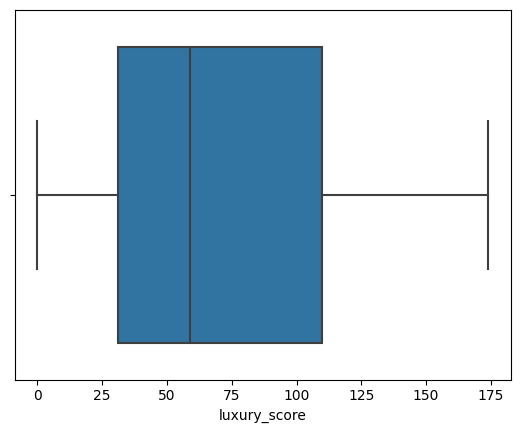

In [8]:
sns.boxplot(x = df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score <50:
        return "low"
    elif 50<= score <150:
        return 'Medium'
    elif 150 <= score <=175:
        return "High"
    else:
        return None

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,luxury_category
853,flat,gwal pahari,5.50,4,5,3+,11.0,New Property,5249.0,1,1,0,1,0,0,"['Water purifier', 'Security / Fire Alarm', 'P...",151,High
2984,flat,sector 65,2.85,4,4,3,2.0,Relatively New,1975.0,1,1,0,0,0,0,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",21,low
2754,flat,sohna road,0.35,2,2,2,14.0,New Property,616.0,0,0,0,0,0,0,"['Power Back-up', 'Security / Fire Alarm', 'Li...",53,Medium
197,flat,sector 102,1.26,2,2,2,10.0,Relatively New,1100.0,0,0,0,0,0,0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",108,Medium
3000,house,sector 2,5.60,8,6,3+,2.0,Moderately old,3240.0,1,1,1,1,0,0,[],0,low


<Axes: xlabel='floorNum'>

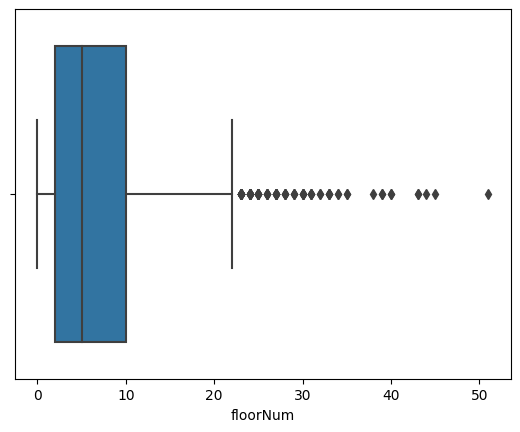

In [12]:
sns.boxplot(x = df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.sample(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,luxury_category,floor_category
3637,flat,sector 84,0.39,2,2,0,5.0,Relatively New,549.0,0,0,0,0,0,0,[],0,low,Mid Floor
25,flat,sector 86,0.50,2,2,1,10.0,Relatively New,578.0,0,0,0,0,0,0,"['Lift(s)', 'Park', 'Shopping Centre']",15,low,Mid Floor
2523,flat,sector 49,2.65,3,4,3,11.0,Moderately old,2251.0,0,1,0,1,0,2,"['Centrally Air Conditioned', 'Water purifier'...",140,Medium,High Floor
1108,flat,sector 3,1.10,2,2,2,14.0,Under Construction,956.0,0,0,0,0,0,0,"['Mini Theatre', 'Foosball', 'Swimming Pool', ...",60,Medium,High Floor
0,flat,sector 33,1.79,3,3,3,3.0,Old Property,1619.0,0,0,0,0,0,0,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H...",71,Medium,Mid Floor


In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)
    
    
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']



[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [17]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,luxury_category,floor_category
0,0.0,39.0,3,3,3.0,3.0,2.0,1619.0,0,0,0,0,0,0,239.0,71,1.0,2.0
1,1.0,5.0,4,5,0.0,12.0,3.0,4700.0,0,0,0,0,0,0,3.0,61,1.0,0.0
2,0.0,47.0,2,2,1.0,3.0,3.0,833.0,0,0,0,0,0,2,667.0,26,2.0,2.0
3,0.0,111.0,2,2,3.0,12.0,1.0,661.0,0,0,0,0,0,0,770.0,36,2.0,0.0
4,1.0,64.0,8,8,4.0,4.0,3.0,1458.0,0,0,1,1,0,2,331.0,94,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,1.0,64.0,4,5,2.0,2.0,2.0,2700.0,0,1,0,1,0,2,285.0,20,2.0,1.0
3678,0.0,94.0,4,4,4.0,18.0,0.0,2576.0,0,1,0,0,0,0,574.0,38,2.0,0.0
3679,1.0,19.0,10,5,4.0,4.0,2.0,8100.0,0,0,0,0,0,0,1870.0,0,2.0,2.0
3680,1.0,30.0,5,6,4.0,4.0,2.0,3618.0,0,0,0,0,1,2,1683.0,79,1.0,2.0


In [18]:
y_label

0        1.79
1        3.15
2        0.42
3        0.40
4        3.80
        ...  
3677     6.00
3678     2.70
3679     9.00
3680    13.50
3681     2.00
Name: price, Length: 3682, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

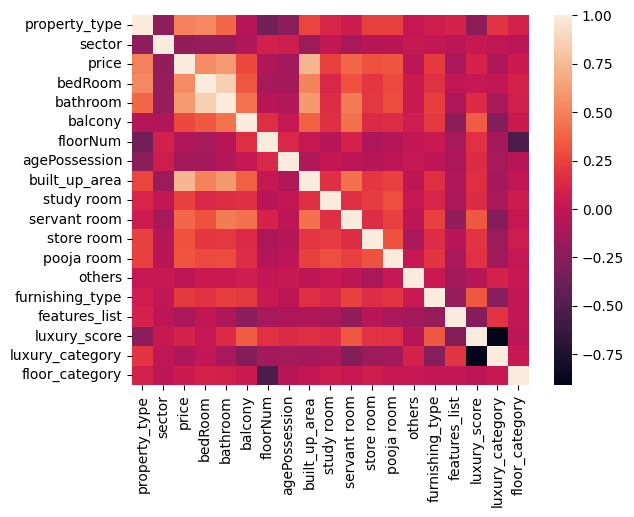

In [19]:
 sns.heatmap(data_label_encoded.corr())

In [20]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202586
1,price,1.000000
2,bedRoom,0.538606
3,bathroom,0.607388
4,balcony,0.271519
5,floorNum,-0.081597
6,agePossession,-0.130076
7,built_up_area,0.739030
8,study room,0.240224
9,servant room,0.392401


### Technique 2 - Random Forest Feature Importance

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.630931
0,property_type,0.110360
1,sector,0.087244
14,features_list,0.027083
15,luxury_score,0.023056
3,bathroom,0.022760
2,bedRoom,0.017809
9,servant room,0.016648
5,floorNum,0.016485
6,agePossession,0.012091


### Technique 3 - Gradient Boosting Feature importances

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.673531
1,sector,0.107439
0,property_type,0.105332
3,bathroom,0.033052
9,servant room,0.022206
2,bedRoom,0.017377
14,features_list,0.012459
10,store room,0.009199
15,luxury_score,0.008433
5,floorNum,0.005243


### Technique 4 - Permutation Importance

In [23]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,0.778293
0,property_type,0.277614
1,sector,0.159144
3,bathroom,0.022178
2,bedRoom,0.019085
5,floorNum,0.016217
9,servant room,0.014090
14,features_list,0.006625
6,agePossession,0.004938
15,luxury_score,0.003912


### Technique 5 - LASSO

In [24]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
7,built_up_area,1.463454
0,property_type,0.783411
3,bathroom,0.420288
10,store room,0.196333
8,study room,0.156304
9,servant room,0.116163
13,furnishing_type,0.115339
11,pooja room,0.073069
5,floorNum,0.030523
16,luxury_category,0.015444


### Technique 6 - RFE

In [25]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,built_up_area,0.628822
0,property_type,0.108544
1,sector,0.089162
14,features_list,0.028598
15,luxury_score,0.024633
3,bathroom,0.023476
2,bedRoom,0.018908
5,floorNum,0.016390
9,servant room,0.016264
6,agePossession,0.010834


### Technique 7 - Linear Regression Weights

In [26]:

from sklearn.linear_model import LinearRegression


# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
7,built_up_area,1.466788
0,property_type,0.802525
3,bathroom,0.497310
10,store room,0.202226
8,study room,0.163557
13,furnishing_type,0.125509
9,servant room,0.115336
11,pooja room,0.080045
5,floorNum,0.057159
16,luxury_category,0.038158


In [27]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [28]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.202586,0.087244,0.107439,0.159144,-0.053597,0.089162,-0.063490
bedRoom,0.538606,0.017809,0.017377,0.019085,-0.167291,0.018908,-0.254115
bathroom,0.607388,0.022760,0.033052,0.022178,0.420288,0.023476,0.497310
balcony,0.271519,0.009287,0.001391,0.003810,-0.042108,0.009406,-0.064153
floorNum,-0.081597,0.016485,0.005243,0.016217,0.030523,0.016390,0.057159
agePossession,-0.130076,0.012091,0.002926,0.004938,-0.046639,0.010834,-0.057011
built_up_area,0.739030,0.630931,0.673531,0.778293,1.463454,0.628822,1.466788
study room,0.240224,0.004462,0.000459,0.001426,0.156304,0.003908,0.163557
servant room,0.392401,0.016648,0.022206,0.014090,0.116163,0.016264,0.115336


In [29]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [36]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.730289
sector             0.118074
bathroom           0.027585
features_list      0.020716
bedRoom            0.019783
servant room       0.018856
luxury_score       0.016691
floorNum           0.014620
agePossession      0.008449
store room         0.007347
balcony            0.006559
furnishing_type    0.003066
study room         0.002823
pooja room         0.001643
floor_category     0.001375
luxury_category    0.001123
others             0.001000
dtype: float64

In [31]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score,luxury_category,floor_category
0,0.0,39.0,3,3,3.0,3.0,2.0,1619.0,0,0,0,0,0,0,239.0,71,1.0,2.0
1,1.0,5.0,4,5,0.0,12.0,3.0,4700.0,0,0,0,0,0,0,3.0,61,1.0,0.0
2,0.0,47.0,2,2,1.0,3.0,3.0,833.0,0,0,0,0,0,2,667.0,26,2.0,2.0
3,0.0,111.0,2,2,3.0,12.0,1.0,661.0,0,0,0,0,0,0,770.0,36,2.0,0.0
4,1.0,64.0,8,8,4.0,4.0,3.0,1458.0,0,0,1,1,0,2,331.0,94,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,1.0,64.0,4,5,2.0,2.0,2.0,2700.0,0,1,0,1,0,2,285.0,20,2.0,1.0
3678,0.0,94.0,4,4,4.0,18.0,0.0,2576.0,0,1,0,0,0,0,574.0,38,2.0,0.0
3679,1.0,19.0,10,5,4.0,4.0,2.0,8100.0,0,0,0,0,0,0,1870.0,0,2.0,2.0
3680,1.0,30.0,5,6,4.0,4.0,2.0,3618.0,0,0,0,0,1,2,1683.0,79,1.0,2.0


feature
built_up_area      0.730289
sector             0.118074
bathroom           0.027585
features_list      0.020716
bedRoom            0.019783
servant room       0.018856
luxury_score       0.016691
floorNum           0.014620
agePossession      0.008449
store room         0.007347
balcony            0.006559
furnishing_type    0.003066
study room         0.002823
pooja room         0.001643
floor_category     0.001375
luxury_category    0.001123
others             0.001000
dtype: float64

In [37]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [38]:
scores.mean()

0.8255647624901089

In [39]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [40]:
scores.mean()

0.8243727100029254

In [41]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [42]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [43]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,store room,furnishing_type,features_list,luxury_score,luxury_category,floor_category,price
0,0.0,39.0,3,3,3.0,3.0,2.0,1619.0,0,0,0,239.0,71,1.0,2.0,1.79
1,1.0,5.0,4,5,0.0,12.0,3.0,4700.0,0,0,0,3.0,61,1.0,0.0,3.15
2,0.0,47.0,2,2,1.0,3.0,3.0,833.0,0,0,2,667.0,26,2.0,2.0,0.42
3,0.0,111.0,2,2,3.0,12.0,1.0,661.0,0,0,0,770.0,36,2.0,0.0,0.40
4,1.0,64.0,8,8,4.0,4.0,3.0,1458.0,0,1,2,331.0,94,1.0,2.0,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,1.0,64.0,4,5,2.0,2.0,2.0,2700.0,1,0,2,285.0,20,2.0,1.0,6.00
3678,0.0,94.0,4,4,4.0,18.0,0.0,2576.0,1,0,0,574.0,38,2.0,0.0,2.70
3679,1.0,19.0,10,5,4.0,4.0,2.0,8100.0,0,0,0,1870.0,0,2.0,2.0,9.00
3680,1.0,30.0,5,6,4.0,4.0,2.0,3618.0,0,0,2,1683.0,79,1.0,2.0,13.50


In [44]:
export_df = export_df.drop(columns=['floorNum','features_list','luxury_score'])

In [45]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,39.0,3,3,3.0,2.0,1619.0,0,0,0,1.0,2.0,1.79
1,1.0,5.0,4,5,0.0,3.0,4700.0,0,0,0,1.0,0.0,3.15
2,0.0,47.0,2,2,1.0,3.0,833.0,0,0,2,2.0,2.0,0.42
3,0.0,111.0,2,2,3.0,1.0,661.0,0,0,0,2.0,0.0,0.40
4,1.0,64.0,8,8,4.0,3.0,1458.0,0,1,2,1.0,2.0,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,1.0,64.0,4,5,2.0,2.0,2700.0,1,0,2,2.0,1.0,6.00
3678,0.0,94.0,4,4,4.0,0.0,2576.0,1,0,0,2.0,0.0,2.70
3679,1.0,19.0,10,5,4.0,2.0,8100.0,0,0,0,2.0,2.0,9.00
3680,1.0,30.0,5,6,4.0,2.0,3618.0,0,0,2,1.0,2.0,13.50


In [46]:
export_df.to_csv('gurgaon_properties_post_feature_selection2.csv', index=False)

In [47]:
# one hot encode -> sector, balcony, agePossession, furnishing type, luxury category, floor category

In [48]:
X = df.drop(columns=['price'])
y = df['price']

In [49]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [50]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

In [51]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

In [52]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [53]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [54]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python 311\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'luxury_category'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Python 311\Lib\site-packages\sklearn\utils\_indexing.py", line 361, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'luxury_category'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Python 311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python 311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\sklearn\compose\_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "C:\Python 311\Lib\site-packages\sklearn\compose\_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python 311\Lib\site-packages\sklearn\utils\_indexing.py", line 369, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe
